In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [313]:
data=pd.read_csv('usa_rain_prediction_dataset_2024_2025.csv')
data.head(10)

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
5,2024-01-06,New York,35.298648,56.598099,21.442424,0.582661,22.825103,1036.043397,0
6,2024-01-07,New York,50.380818,95.424193,8.753319,0.000000,36.820958,1032.337889,0
7,2024-01-08,New York,79.967007,28.186104,27.495322,0.105845,77.807459,1039.897652,0
8,2024-01-09,New York,36.565489,72.099621,19.885635,0.910368,34.333699,975.446601,1
9,2024-01-10,New York,69.600506,30.248213,0.325415,0.000000,46.825566,1039.132281,0


In [314]:
print(data.shape)

(73100, 9)


In [315]:
data['Rain Tomorrow'].value_counts()

Rain Tomorrow
0    56988
1    16112
Name: count, dtype: int64

In [316]:
col=data.columns.tolist()
print(col)
col=col.remove('Rain Tomorrow')


['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow']


In [317]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB
None


In [318]:
print(data.describe())

        Temperature      Humidity    Wind Speed  Precipitation   Cloud Cover  \
count  73100.000000  73100.000000  73100.000000   73100.000000  73100.000000   
mean      65.182270     59.875041     15.017946       0.390635     54.942807   
std       20.205793     23.066115      8.668729       0.474833     25.982487   
min       30.000766     20.000272      0.000712       0.000000     10.000856   
25%       47.678968     39.800732      7.485182       0.000000     32.318668   
50%       65.294949     59.887840     15.102495       0.196909     55.011121   
75%       82.636570     79.835990     22.551794       0.673177     77.412469   
max       99.997393     99.999025     29.999017       3.078090     99.998957   

           Pressure  Rain Tomorrow  
count  73100.000000   73100.000000  
mean    1005.176013       0.220410  
std       20.203889       0.414526  
min      970.000919       0.000000  
25%      987.697646       0.000000  
50%     1005.284188       0.000000  
75%     1022.727410 

In [319]:
data.isnull().sum()


Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

In [320]:
d1 = data.drop(['Date', 'Location','Rain Tomorrow'], axis=1)
skewness = d1.skew()
print(skewness)
d1['Precipitation']=np.log1p(d1['Precipitation'])
skewness2 = d1.skew()
print(skewness2)

Temperature     -0.014391
Humidity         0.003375
Wind Speed      -0.007681
Precipitation    1.241112
Cloud Cover      0.000772
Pressure        -0.010555
dtype: float64
Temperature     -0.014391
Humidity         0.003375
Wind Speed      -0.007681
Precipitation    0.762855
Cloud Cover      0.000772
Pressure        -0.010555
dtype: float64


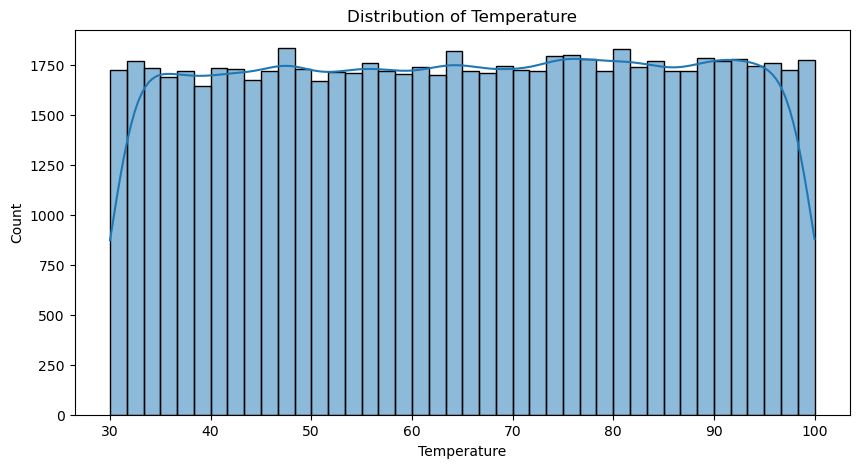

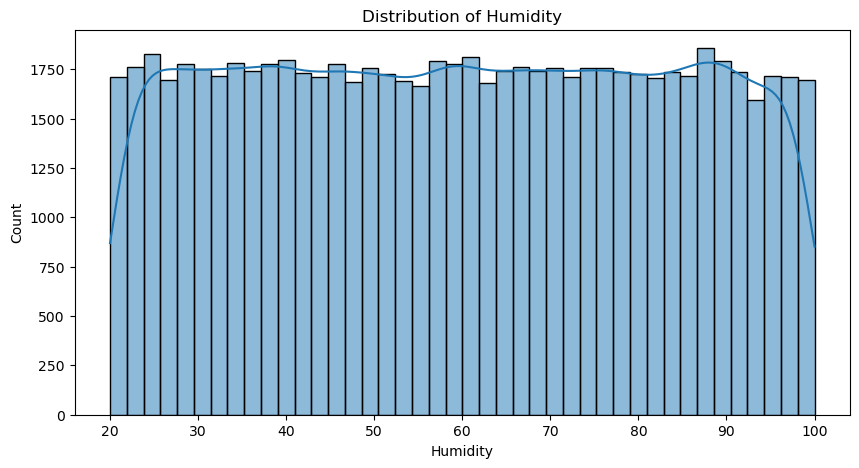

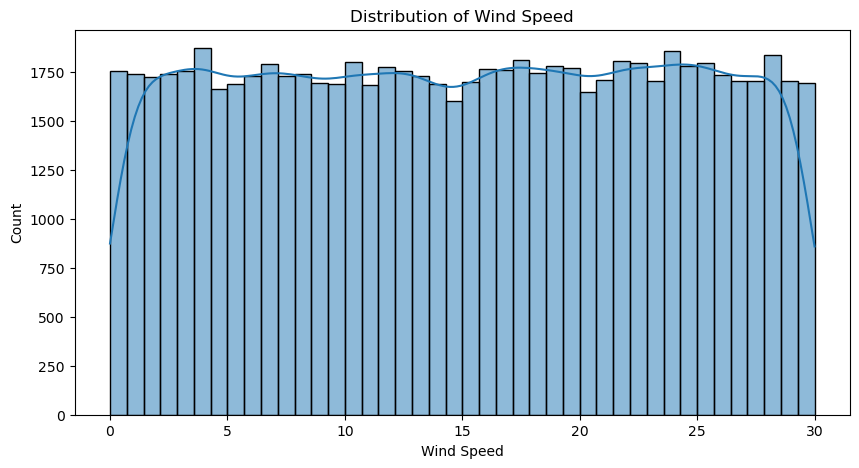

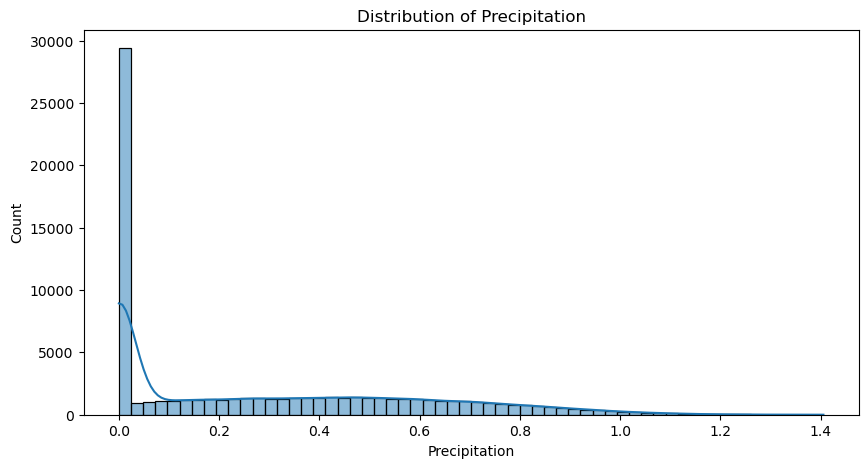

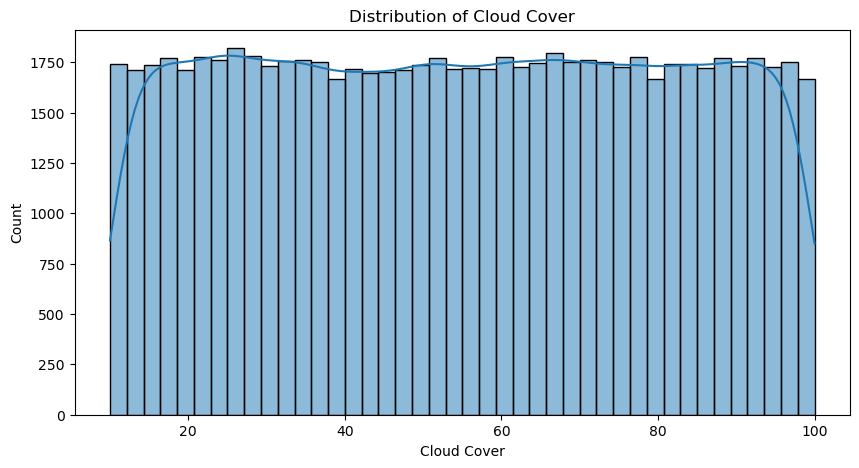

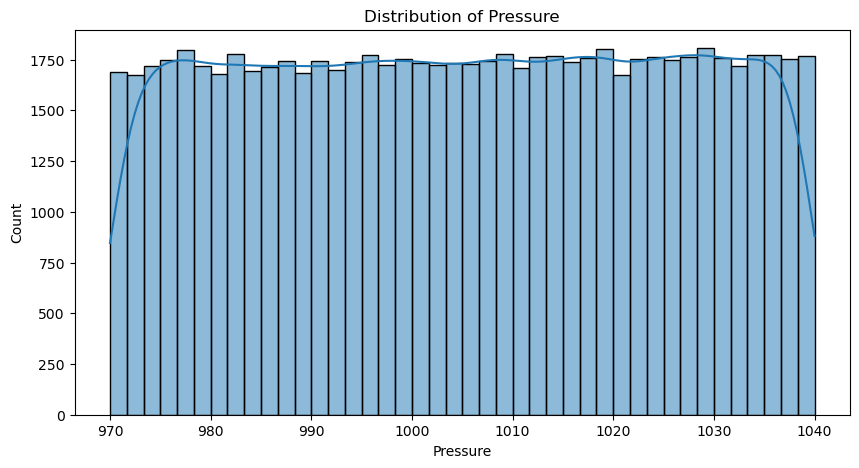

In [321]:
for cols in d1.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data=d1, x=cols, kde=True)
    plt.title(f'Distribution of {cols}')
    plt.show()

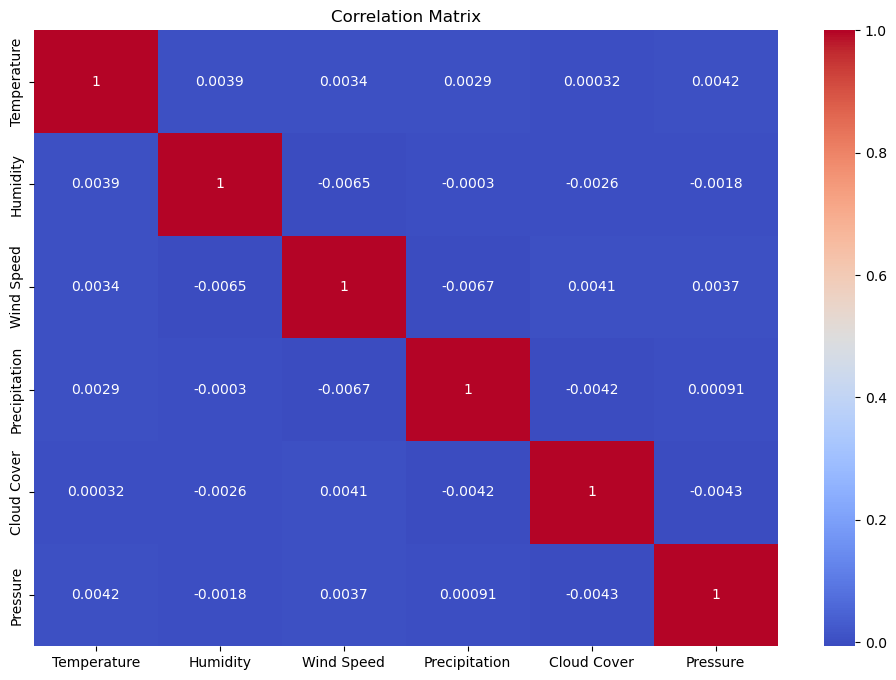

In [322]:

cor=d1.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

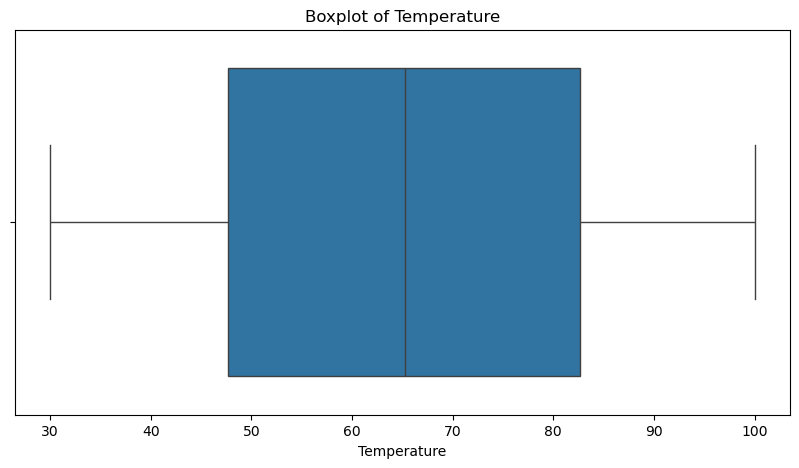

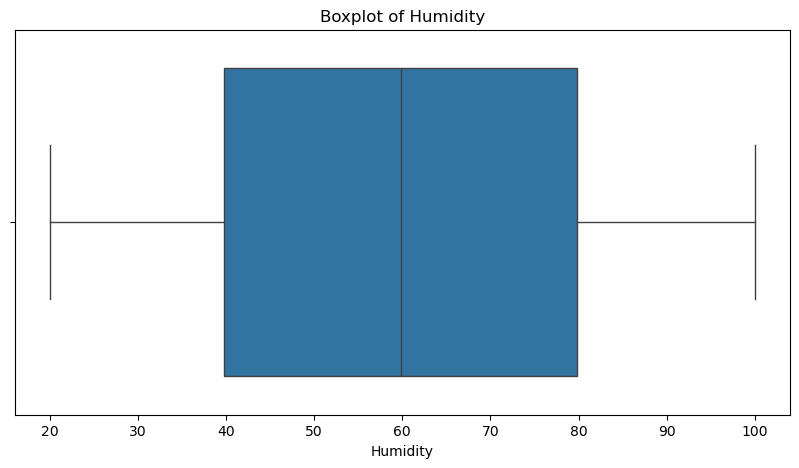

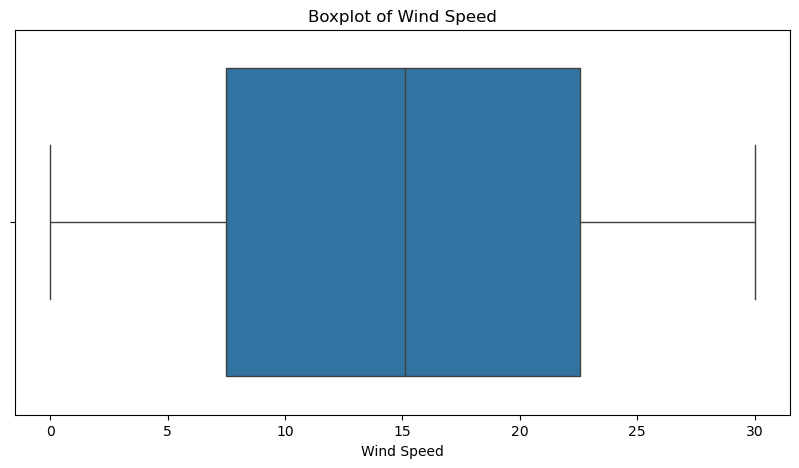

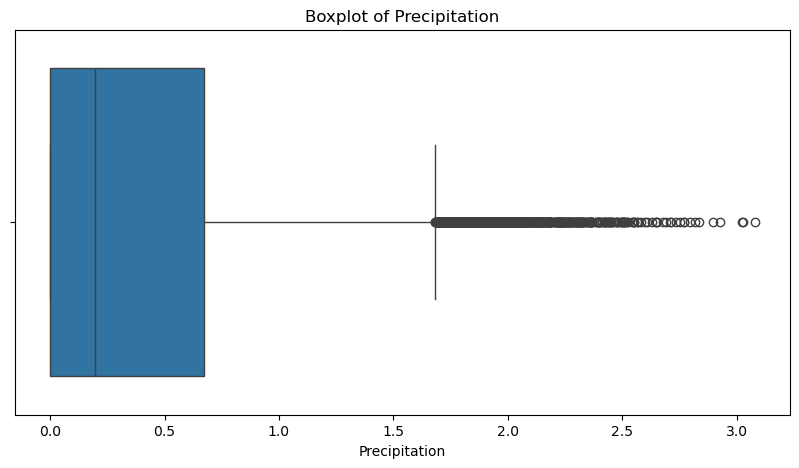

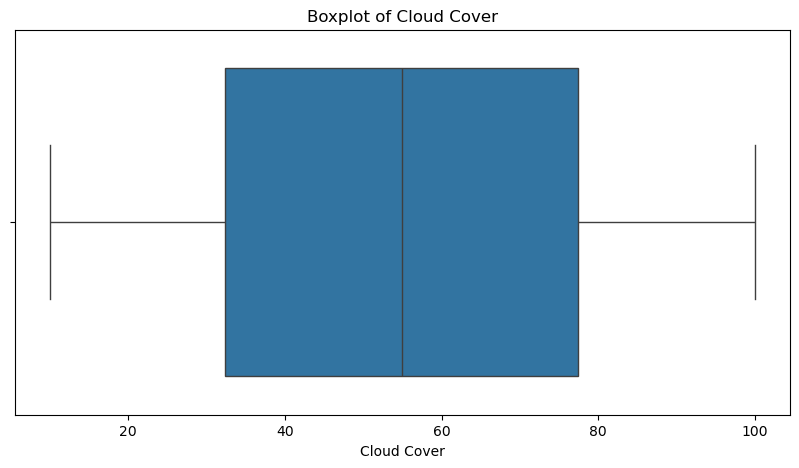

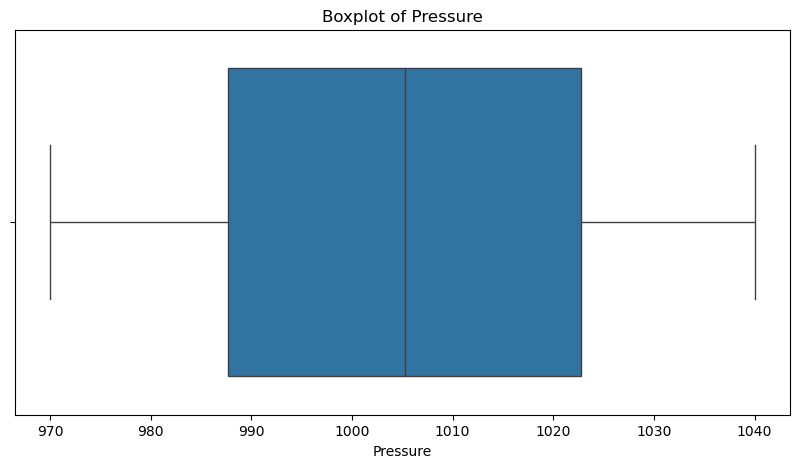

In [323]:
for cols in d1.columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=data[cols])
    plt.title(f'Boxplot of {cols}')
    plt.show()

In [324]:
d1.shape

(73100, 6)

In [325]:
Q1 = d1.quantile(0.25)
Q3 = d1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
d1 = d1[((d1 > lower_bound) | (d1 < upper_bound)).any(axis=1)]
print(d1.shape)

Temperature      34.957602
Humidity         40.035258
Wind Speed       15.066612
Precipitation     0.514724
Cloud Cover      45.093802
Pressure         35.029763
dtype: float64
(73100, 6)


In [326]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

feature_names = ['Temperature', 'Humidity', 'Wind Speed', 'Pressure']
X = d1[feature_names]
y = data['Rain Tomorrow']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)


In [327]:
clf = RandomForestClassifier(n_estimators=10, class_weight='balanced', random_state=42)
clf.fit(x_train_res, y_train_res)
y_pred_rf = clf.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
cv_scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Test Accuracy: 0.7433652530779754
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.82     11398
           1       0.44      0.66      0.53      3222

    accuracy                           0.74     14620
   macro avg       0.67      0.71      0.68     14620
weighted avg       0.79      0.74      0.76     14620

Confusion Matrix:
 [[8729 2669]
 [1083 2139]]
Cross-validation accuracy scores: [0.7621751  0.76121751 0.76367989 0.76627907 0.76716826]
Mean cross-validation accuracy: 0.7641039671682627


In [328]:
bayes=BernoulliNB()
bayes.fit(x_train_res,y_train_res)
y_pred_bayes=bayes.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_bayes))
print("Classification Report:\n", classification_report(y_test, y_pred_bayes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bayes))
cv_scores_bayes = cross_val_score(bayes, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores_bayes)
print("Mean cross-validation accuracy:", cv_scores_bayes.mean())

Test Accuracy: 0.7264021887824897
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79     11398
           1       0.45      1.00      0.62      3222

    accuracy                           0.73     14620
   macro avg       0.72      0.82      0.70     14620
weighted avg       0.88      0.73      0.75     14620

Confusion Matrix:
 [[7398 4000]
 [   0 3222]]
Cross-validation accuracy scores: [0.77961696 0.77961696 0.77961696 0.77954856 0.77954856]
Mean cross-validation accuracy: 0.7795896032831736


In [329]:
sample_row1 = d1.iloc[0][feature_names]
sample_row_df1 = pd.DataFrame([sample_row1])
sample_row_scaled1 = scaler.transform(sample_row_df1)

# Predict using the trained model
sample_prediction1 =clf.predict(sample_row_scaled1)
print("Prediction for sample row:", sample_prediction1)
print("Actual value:", data.iloc[0]['Rain Tomorrow'])

Prediction for sample row: [0]
Actual value: 0


In [330]:
sample_row = d1.iloc[0][feature_names]
sample_row_df = pd.DataFrame([sample_row])
sample_row_scaled = scaler.transform(sample_row_df)

# Predict using the trained model
sample_prediction =bayes.predict(sample_row_scaled)
print("Prediction for sample row:", sample_prediction)
print("Actual value:", data.iloc[0]['Rain Tomorrow'])

Prediction for sample row: [1]
Actual value: 0


In [336]:
import pickle

# Save the trained RandomForest model
with open("random_model.pkl", "wb") as f:
    pickle.dump(clf, f)

# Save the fitted scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)